### Data extraction

In [2]:
# import relevant librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
from filepath import BRFSS23
raw_data = pd.read_sas(BRFSS23, format='xport')

### Explolaroty Data Analysis

In [4]:
#examaine the data
raw_data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,b'03012023',b'03',b'01',b'2023',1100.0,b'2023000001',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0,1.0,1.0,9.0
1,1.0,1.0,b'01062023',b'01',b'06',b'2023',1100.0,b'2023000002',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,b'03082023',b'03',b'08',b'2023',1100.0,b'2023000003',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,b'03062023',b'03',b'06',b'2023',1100.0,b'2023000004',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,b'01062023',b'01',b'06',b'2023',1100.0,b'2023000005',2.023000e+09,1.0,...,7.000000e+00,1.0,4.700000e+01,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [5]:
# examine the dataset shape
raw_data_size = raw_data.shape[0]

In [6]:
# figure out the data's info >> we found that the entire table is too large (350 columns) so they're unable to display it enrirely.
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Columns: 350 entries, _STATE to _DRNKDRV
dtypes: float64(345), object(5)
memory usage: 1.1+ GB


In [7]:
# we need to select just some of the columns, we need to read the codebook, then find out.
'''
We will select the following columns for further analysis (SAS Variable name: Label)
'DIABETE4'  : Ever told you had diabetes
'_STATE'    : State FIPS Code
'SEXVAR'    : Sex of Respondent
'_AGEG5YR'  : Age Group
'_METSTAT'  : Metropolitan Status
'HTM4'      : Height in cm
'WTKG3'     : Weight in kg
'_BMI5'     : Body Mass Index
'INCOME3'   : Income Level
'GENHLTH'   : General Health (respondent's self-assessment)
'SMOKE100'  : Smoked at least 100 cigarettes in your entire life
'AVEDRNK3'  : Avg alcoholic drinks per day in past 30 days (12oz beer, 5oz wine, 1shot liq)
'COVIDPO1'  : Have you ever tested positive for COVID-19?
'PHYSHLTH'  : Number of Days Physical Health Not Good
'MENTHLTH'  : Nmber of Days Mental Health Not Good
'MEDCOST1'  : Could not afford to see a doctor in the last 12 months
'CHECKUP1'  : Length of time since last checkup
'_TOTINDA'  : Leisure Time Physical Activity Calculated Variable
'BPHIGH6'   : Ever told Blood pressure high
'TOLDHI3'   : Ever told Chlesterol is high
'CVDINFR4'  : Ever diagnosed with Heart Attack
'CVDCRHD4'  : Ever Diagnosed with Angina or Coronary Heart disease
'CVDSTRK3'  : Ever Diagnosed with a Stroke
'ASTHMA3'   : Ever Diagnosed with a Asthma
'ADDEPEV3'  : Ever told you had a depressive disorder
'CHCKDNY2'  : Ever told you have kidney disease
'''

selected_columns = ['DIABETE4','_STATE','SEXVAR','_AGEG5YR','_METSTAT','HTM4',
                    'WTKG3','_BMI5','INCOME3','GENHLTH','SMOKE100',
                    'AVEDRNK3','COVIDPO1','PHYSHLTH','MENTHLTH','MEDCOST1',
                    'CHECKUP1','_TOTINDA','BPHIGH6','TOLDHI3','CVDINFR4',
                    'CVDCRHD4','CVDSTRK3','ASTHMA3','ADDEPEV3','CHCKDNY2']

In [8]:
# extract the data by only the selected columns
data = raw_data[selected_columns]

In [9]:
# count the na values
data.isna().sum()

DIABETE4         5
_STATE           0
SEXVAR           0
_AGEG5YR         0
_METSTAT      8323
HTM4         22141
WTKG3        34151
_BMI5        40535
INCOME3       8075
GENHLTH          4
SMOKE100     19674
AVEDRNK3    221197
COVIDPO1     32015
PHYSHLTH         3
MENTHLTH         3
MEDCOST1         2
CHECKUP1         2
_TOTINDA         0
BPHIGH6          3
TOLDHI3      51812
CVDINFR4         3
CVDCRHD4         3
CVDSTRK3         4
ASTHMA3          3
ADDEPEV3         3
CHCKDNY2         3
dtype: int64

We read the documents of AVEDRNK3 and found that the largest portion of the missing values comes from those who didn't have a drink during the past 30 days. So, we need to imply that they're not drinkers in our datasets.
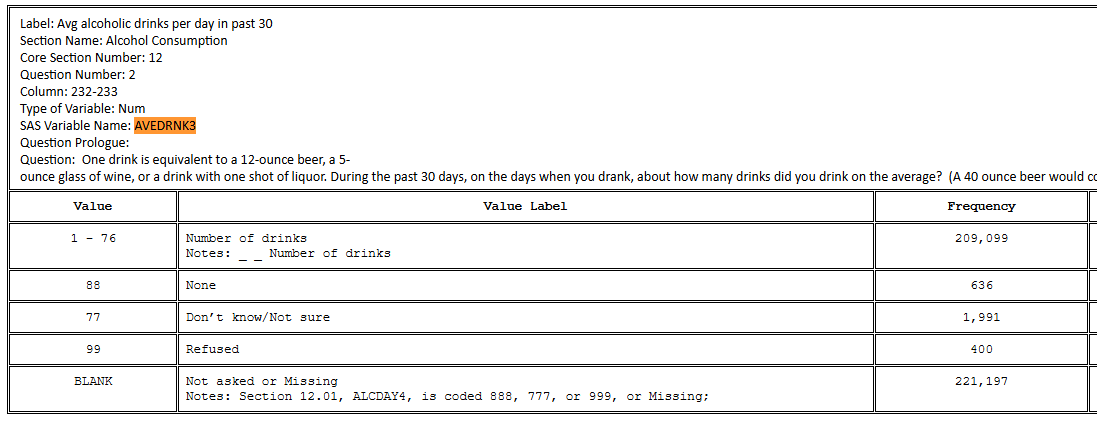
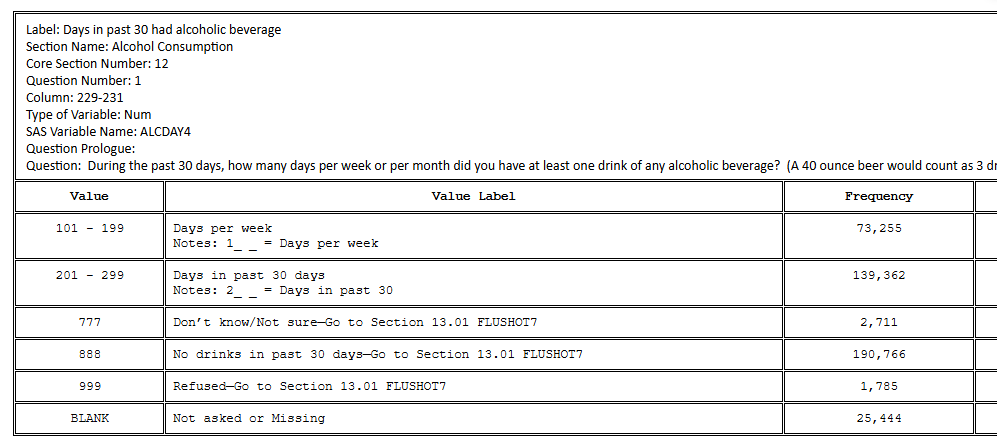

In [10]:
data['AVEDRNK3'].unique()

array([nan,  1.,  2.,  4.,  5.,  6.,  3., 88., 77., 12., 10.,  7., 20.,
       14.,  9., 15.,  8., 99., 16., 40., 13., 18., 11., 60., 76., 30.,
       24., 27., 36., 70., 69., 25., 22., 50., 17., 23., 62., 75., 32.,
       52., 48., 45., 21., 59., 46., 35., 28., 42., 63., 73., 19., 29.,
       64.])

In [11]:
# handling AVEDRINK3 nan values before dropping
data['AVEDRNK3'] = data['AVEDRNK3'].fillna(0)
data['DIABETE4'] = data['DIABETE4'].replace({77:0, 88:0, 99:0})

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\3359900771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AVEDRNK3'] = data['AVEDRNK3'].fillna(0)
C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\3359900771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DIABETE4'] = data['DIABETE4'].replace({77:0, 88:0, 99:0})


In [12]:
data.isna().sum()

DIABETE4        5
_STATE          0
SEXVAR          0
_AGEG5YR        0
_METSTAT     8323
HTM4        22141
WTKG3       34151
_BMI5       40535
INCOME3      8075
GENHLTH         4
SMOKE100    19674
AVEDRNK3        0
COVIDPO1    32015
PHYSHLTH        3
MENTHLTH        3
MEDCOST1        2
CHECKUP1        2
_TOTINDA        0
BPHIGH6         3
TOLDHI3     51812
CVDINFR4        3
CVDCRHD4        3
CVDSTRK3        4
ASTHMA3         3
ADDEPEV3        3
CHCKDNY2        3
dtype: int64

In [13]:
# examine total number of rows with na-dropped to evaluate the impact
print(f"If we dropped all nan values, we still have {"{:,}".format(data.dropna().shape[0])} rows to work with.")
print(f"If we dropped all nan values, we still have {"{:,.2f}".format((data.dropna().shape[0]/data.shape[0])*100)}% of the whole datasets.")

If we dropped all nan values, we still have 325,492 rows to work with.
If we dropped all nan values, we still have 75.12% of the whole datasets.


We lost around 25% of the datasets before proceed just dropping nan values.
However, we still have 325,492 observations, which is still a large number to perform further analysis.
So, we proceed the nan values dropping.

In [14]:
data.dropna(inplace=True)

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


### Data Cleansing
From now on, we will do the data cleansing process to make it more suitable for further analysis.

In [15]:
# DIABETE4
'''
1 as 1
Others as 0
'''
data['DIABETE4'] = data['DIABETE4'].replace({2:0, 3:0, 4:0, 7:0, 9:0})
data['DIABETE4'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\2379876285.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DIABETE4'] = data['DIABETE4'].replace({2:0, 3:0, 4:0, 7:0, 9:0})


array([1., 0.])

In [16]:
# _AGEG5YR
'''
Drop 14 from datasets
'''
data.drop(data[data['_AGEG5YR'] == 14].index, inplace = True)

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\641742790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['_AGEG5YR'] == 14].index, inplace = True)


In [17]:
# WTKG3
'''
Need to divide by 100 since codebook implies 2 decimal places
'''
data['WTKG3'] = round(data['WTKG3']/100)

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\2647309186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WTKG3'] = round(data['WTKG3']/100)


In [18]:
# _BMI5
'''
Need to divide by 100 since codebook implies 2 decimal places
'''
data['_BMI5'] = round(data['_BMI5']/100)

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\2362444201.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_BMI5'] = round(data['_BMI5']/100)


In [19]:
# INCOME3
'''
drop 77 and 99
'''
# we will drop the whole role
data.drop(data[(data['INCOME3'] == 77) | (data['INCOME3'] == 99)].index, inplace=True)
data['INCOME3'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\3690678695.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['INCOME3'] == 77) | (data['INCOME3'] == 99)].index, inplace=True)


array([ 2.,  7.,  6.,  9.,  3.,  5.,  4.,  8., 11., 10.,  1.])

In [20]:
# GENHLTH
''' Will assume 7 and 9 as 4 (fair) '''
data['GENHLTH'] = data['GENHLTH'].replace({7:4, 9:4})
data['GENHLTH'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\4269662335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GENHLTH'] = data['GENHLTH'].replace({7:4, 9:4})


array([4., 3., 2., 1., 5.])

In [21]:
# SMOKE100
'''
Will assuume 7 and 9 as 0
also set 2 as 0
'''
data['SMOKE100'] = data['SMOKE100'].replace({2:0,7:0,9:0})
data['SMOKE100'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\2052248387.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMOKE100'] = data['SMOKE100'].replace({2:0,7:0,9:0})


array([1., 0.])

In [22]:
# AVEDRNK3
'''
Assume 77, 88, and 99 as 0
'''
data['AVEDRNK3'] = data['AVEDRNK3'].replace({77:0, 88:0, 99:0})

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\927771279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AVEDRNK3'] = data['AVEDRNK3'].replace({77:0, 88:0, 99:0})


In [23]:
# COVIDPO1
'''
Assume 2, 7, and 9 as 0
'''
data['COVIDPO1'] = data['COVIDPO1'].replace({2:0, 7:0, 9:0})
data['COVIDPO1'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\1849479447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['COVIDPO1'] = data['COVIDPO1'].replace({2:0, 7:0, 9:0})


array([0., 1.])

In [24]:
# PHYSHLTH
'''
Replace 77, 88, and 99 with 0
'''
data['PHYSHLTH'] = data['PHYSHLTH'].replace({77:0, 88:0, 99:0})
data['PHYSHLTH'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\343678848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PHYSHLTH'] = data['PHYSHLTH'].replace({77:0, 88:0, 99:0})


array([ 6.,  0.,  2.,  8.,  5.,  4., 21., 10., 25.,  7., 30., 20.,  1.,
        3., 26., 14., 15., 24., 18., 13., 28., 16., 12., 17., 29., 22.,
       27., 11.,  9., 23., 19.])

In [25]:
# MENTHLTH
'''
Replace 77, 88, and 99 with 0
'''
data['MENTHLTH'] = data['MENTHLTH'].replace({77:0, 88:0, 99:0})
data['MENTHLTH'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\1067037262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MENTHLTH'] = data['MENTHLTH'].replace({77:0, 88:0, 99:0})


array([ 2.,  0.,  3., 25., 10., 30., 20., 15.,  5., 12.,  1., 21.,  7.,
       14.,  4., 29.,  8., 16.,  6., 17.,  9., 28., 11., 18., 22., 13.,
       24., 27., 26., 19., 23.])

In [26]:
# MEDCOST1
'''
Replace 2, 7, and 9 as 0
'''
data['MEDCOST1'] = data['MEDCOST1'].replace({2:0, 7:0, 9:0})
data['MEDCOST1'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\131579007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MEDCOST1'] = data['MEDCOST1'].replace({2:0, 7:0, 9:0})


array([1., 0.])

In [27]:
# CHECKUP1
'''
Replace 7 as 1
Replace 9 as 8
'''
data['CHECKUP1'] = data['CHECKUP1'].replace({7:1,9:8})
data['CHECKUP1'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\2753517401.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CHECKUP1'] = data['CHECKUP1'].replace({7:1,9:8})


array([1., 2., 8., 4., 3.])

In [28]:
# _TOTINDA
'''
Drop 9 from datasets
'''
data.drop(data[data['_TOTINDA'] == 9].index, inplace = True)

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\2090788992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['_TOTINDA'] == 9].index, inplace = True)


In [29]:
# BPHIGH6
'''
Drop 9 from datasets
Replace 2, 3, 4, 7 as 0
'''
data['BPHIGH6'] = data['BPHIGH6'].replace({2:0, 3:0, 4:0, 7:0})
data.drop(data[data['BPHIGH6'] == 9].index, inplace=True)

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\1030756624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BPHIGH6'] = data['BPHIGH6'].replace({2:0, 3:0, 4:0, 7:0})
C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\1030756624.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['BPHIGH6'] == 9].index, inplace=True)


In [30]:
# TOLDHI3
'''
Drop 9 from datasets
Replace 2 and 7 as 0
'''
data['TOLDHI3'] = data['TOLDHI3'].replace({2:0, 7:0})
data.drop(data[data['TOLDHI3'] == 9].index, inplace=True)

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\1144647727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TOLDHI3'] = data['TOLDHI3'].replace({2:0, 7:0})
C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\1144647727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['TOLDHI3'] == 9].index, inplace=True)


In [31]:
# CVDINFR4
'''
Replace 2, 7, and 9 as 0
'''
data['CVDINFR4'] = data['CVDINFR4'].replace({2:0, 7:0, 9:0})
data['CVDINFR4'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\3463810395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CVDINFR4'] = data['CVDINFR4'].replace({2:0, 7:0, 9:0})


array([0., 1.])

In [32]:
# CVDCRHD4
'''
Replace 2, 7, and 9 as 0
'''
data['CVDCRHD4'] = data['CVDCRHD4'].replace({2:0, 7:0, 9:0})
data['CVDCRHD4'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\1226176448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CVDCRHD4'] = data['CVDCRHD4'].replace({2:0, 7:0, 9:0})


array([0., 1.])

In [33]:
# CVDSTRK3
'''
Replace 2, 7, and 9 as 0
'''
data['CVDSTRK3'] = data['CVDSTRK3'].replace({2:0, 7:0, 9:0})
data['CVDSTRK3'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\1092256651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CVDSTRK3'] = data['CVDSTRK3'].replace({2:0, 7:0, 9:0})


array([0., 1.])

In [34]:
# ASTHMA3
'''
Replace 2, 7, and 9 as 0
'''
data['ASTHMA3'] = data['ASTHMA3'].replace({2:0, 7:0, 9:0})
data['ASTHMA3'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\2275906823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ASTHMA3'] = data['ASTHMA3'].replace({2:0, 7:0, 9:0})


array([1., 0.])

In [35]:
# ADDEPEV3
'''
Replace 2, 7, and 9 as 0
'''
data['ADDEPEV3'] = data['ADDEPEV3'].replace({2:0, 7:0, 9:0})
data['ADDEPEV3'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\1251387970.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ADDEPEV3'] = data['ADDEPEV3'].replace({2:0, 7:0, 9:0})


array([0., 1.])

In [36]:
# CHCKDNY2
'''
Replace 2, 7, and 9 as 0
'''
data['CHCKDNY2'] = data['CHCKDNY2'].replace({2:0, 7:0, 9:0})
data['CHCKDNY2'].unique()

C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\2649133463.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CHCKDNY2'] = data['CHCKDNY2'].replace({2:0, 7:0, 9:0})


array([0., 1.])

In [37]:
data.columns

Index(['DIABETE4', '_STATE', 'SEXVAR', '_AGEG5YR', '_METSTAT', 'HTM4', 'WTKG3',
       '_BMI5', 'INCOME3', 'GENHLTH', 'SMOKE100', 'AVEDRNK3', 'COVIDPO1',
       'PHYSHLTH', 'MENTHLTH', 'MEDCOST1', 'CHECKUP1', '_TOTINDA', 'BPHIGH6',
       'TOLDHI3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ADDEPEV3',
       'CHCKDNY2'],
      dtype='object')

In [38]:
new_data_size = data.shape[0]

In [39]:
# calculate the portion of new datasize after transformed compared to the originals
print(f"After data transformation, we fount that we still have {"{:,}".format(new_data_size)} rows for further analytical process.\n\
      Compared to original, we lost {"{:.2f}".format((1 - (new_data_size/raw_data_size))*100)}% of data during cleaning and transformation process.")

After data transformation, we fount that we still have 274,667 rows for further analytical process.
      Compared to original, we lost 36.61% of data during cleaning and transformation process.


### 

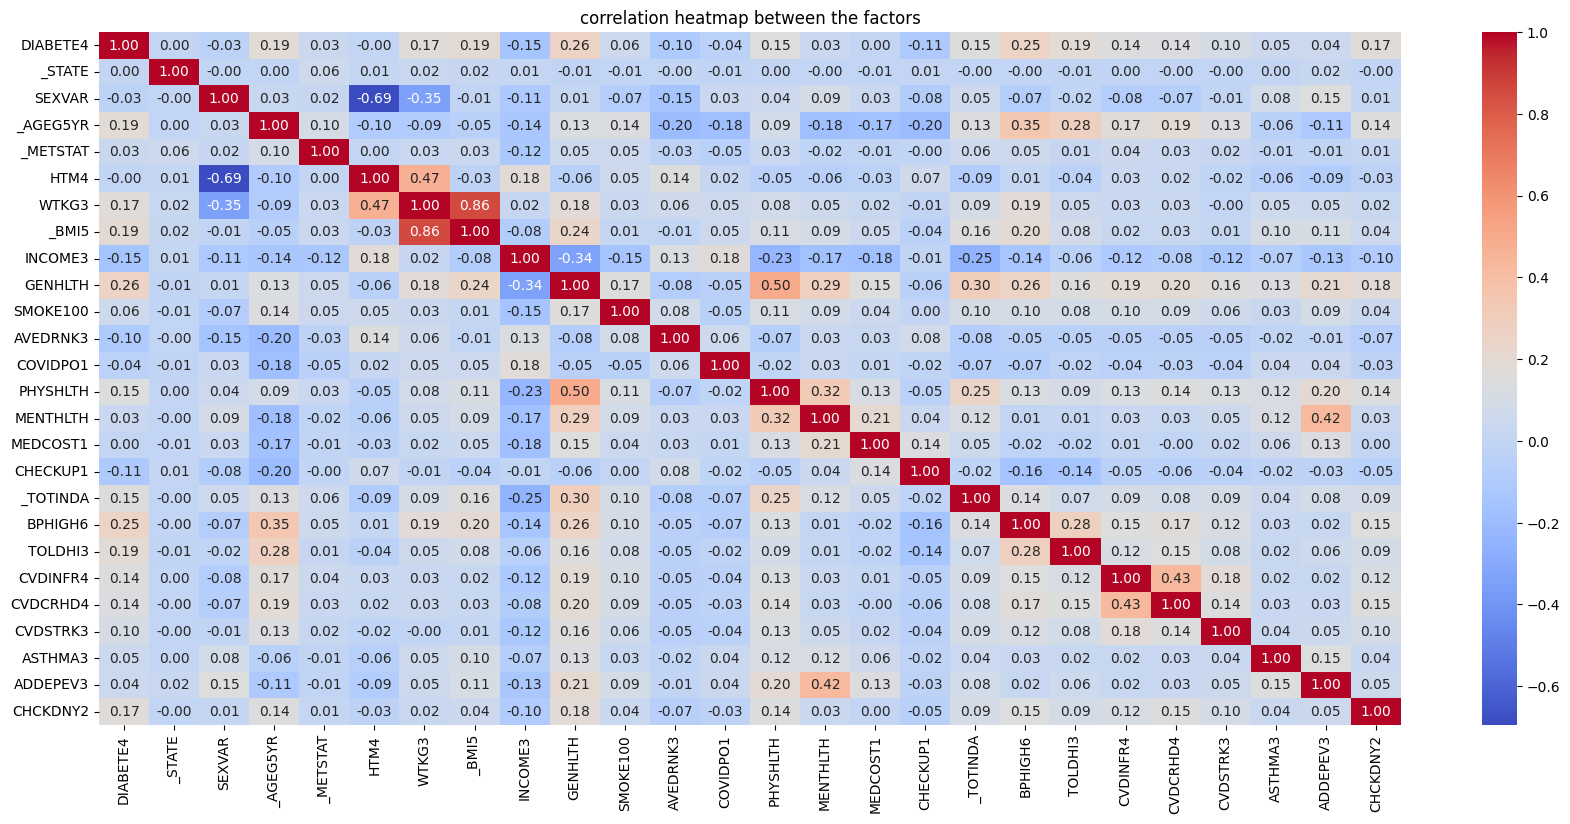

In [40]:
# build the correlation heatmap
plt.figure(figsize=(21,9))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('correlation heatmap between the factors')
plt.show()

In [41]:
# find out top 5 of highest behavioral risk factors associated with diabetes
data.corr()['DIABETE4'].abs().sort_values(ascending=False)[1:6]

GENHLTH     0.264717
BPHIGH6     0.254604
_BMI5       0.194286
_AGEG5YR    0.191464
TOLDHI3     0.189510
Name: DIABETE4, dtype: float64

In [42]:
# store top 5 attributes with highest correlation to diabetes into new variables.
top5 = list(data.corr()['DIABETE4'].abs().sort_values(ascending=False).index[1:6])
top5

['GENHLTH', 'BPHIGH6', '_BMI5', '_AGEG5YR', 'TOLDHI3']

In [43]:
# import the state database into workspace
state = pd.read_csv('_STATEREF.csv', usecols=['Value', 'Value Label'])
state.rename(columns={'Value':'_STATE', 'Value Label':'States'},inplace=True)

In [44]:
age = pd.read_csv('_AGEG5YRREF.csv', usecols=['Value', 'Value Label'])
age.rename(columns={'Value':'_AGEG5YR', 'Value Label':'Age_Group'},inplace=True)

In [45]:
data.head()

,DIABETE4,_STATE,SEXVAR,_AGEG5YR,_METSTAT,HTM4,WTKG3,_BMI5,INCOME3,GENHLTH,...,CHECKUP1,_TOTINDA,BPHIGH6,TOLDHI3,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ADDEPEV3,CHCKDNY2
2,0.0,1.0,2.0,13.0,1.0,163.0,59.0,22.0,2.0,4.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,2.0,12.0,1.0,173.0,77.0,26.0,7.0,4.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,2.0,9.0,1.0,157.0,75.0,30.0,7.0,3.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,1.0,13.0,2.0,183.0,82.0,24.0,6.0,4.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,2.0,13.0,1.0,163.0,88.0,33.0,6.0,3.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
state.head()

,_STATE,States
0,1,Alabama
1,2,Alaska
2,4,Arizona
3,5,Arkansas
4,6,California


In [47]:
# join the dataframe
data = data.join(state.set_index('_STATE'),on='_STATE',rsuffix='_ref')
data = data.join(age.set_index('_AGEG5YR'),on='_AGEG5YR',rsuffix='_ref')

In [48]:
data.head()

,DIABETE4,_STATE,SEXVAR,_AGEG5YR,_METSTAT,HTM4,WTKG3,_BMI5,INCOME3,GENHLTH,...,BPHIGH6,TOLDHI3,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ADDEPEV3,CHCKDNY2,States,Age_Group
2,0.0,1.0,2.0,13.0,1.0,163.0,59.0,22.0,2.0,4.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Alabama,Age 80 or older
4,1.0,1.0,2.0,12.0,1.0,173.0,77.0,26.0,7.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Alabama,Age 75 to 79
5,0.0,1.0,2.0,9.0,1.0,157.0,75.0,30.0,7.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Alabama,Age 60 to 64
6,0.0,1.0,1.0,13.0,2.0,183.0,82.0,24.0,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alabama,Age 80 or older
8,0.0,1.0,2.0,13.0,1.0,163.0,88.0,33.0,6.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Alabama,Age 80 or older


In [49]:
# export the data into new .csv file
data.to_csv('BRFSS23_diabetes_cleaned.csv')

As a reminder, those factors could be described as follows:\
GENHLTH     : Self-assessment of respendent's general health conditions.\
BPHIGH6     : Indicated to have high blood pressure issues.\
_BMI5       : Respondent's Body Mass Index.\
TOLDHI3     : Indicated to have high Cholesterol issues.\
_AGEG5YR    : Age groups.\

We will use these 5 factors for further ML model fit.

### DIabetes Prediction using various learning model
In this section, we will build up the various machine learning model, which we consider that suitable for classification problems e.g. Logistic Regression, K-nearest neighbors, etc. We will develop each model, optimize them, and compared the accuracy of each model.

In [50]:
# count the number of those with diabetes, and those who doesn't. We need to balance the data before proceed. 
data['DIABETE4'].value_counts()

DIABETE4
0.0    233882
1.0     40785
Name: count, dtype: int64

In [51]:
# balance the data by smapling the non-diabetes person
nondiabetes_sampling = data[data['DIABETE4'] == 0].sample(len(data[data['DIABETE4'] == 1]), random_state=0)
data_balanced = pd.concat([data[data['DIABETE4'] == 1], nondiabetes_sampling])

In [52]:
# exported balance data onto .csv files for further optimization
data_balanced.to_csv("BRFSS23_diabetes_balanced.csv")

In [53]:
data_balanced['DIABETE4'].value_counts()

DIABETE4
1.0    40785
0.0    40785
Name: count, dtype: int64

From this point, we have a datasets which is suitable for further ML model development.\
We use guideline from https://machinelearningmastery.com/machine-learning-in-python-step-by-step to build up the predictions from each machine learning models. Then we optimize it.

In [54]:
# import ML-related libraries
import scipy
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [55]:
# split the data into train and test datasets
x = data_balanced[top5]
y = data_balanced['DIABETE4']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [56]:
# in this case, we have varios models which we could build, so we will compare the accuracy for each model
# list up the ML model used
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))

In [57]:
# create the loop to store the accuracy results
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {'{:.4f}'.format(cv_results.mean())} ({'{:.4f}'.format(cv_results.std())})")

LR: 0.7258 (0.0036)
LDA: 0.7265 (0.0041)
KNN: 0.6949 (0.0049)
CART: 0.7083 (0.0047)
GNB: 0.7240 (0.0035)


C:\Users\abejr\AppData\Local\Temp\ipykernel_4108\1263723964.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


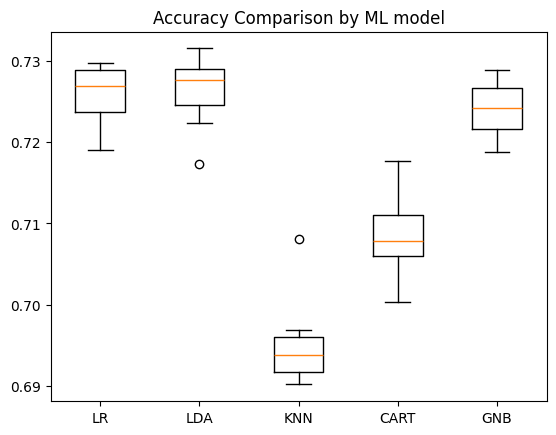

In [58]:
# visualize algorithms
plt.boxplot(results, labels=names)
plt.title('Accuracy Comparison by ML model')
plt.show()

After comparing each model, we select LogisticRegression for further optimization process.

In [62]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7219566016917984


In [69]:
model = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.721139307752033


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred)
cm2_percent = cm2.astype('float') / cm2.sum() * 100

# Plot Confusion Matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2_percent, display_labels=['Non-Diabetic', 'Diabetic'])
disp2.plot(cmap='Blues', values_format='.2f')

plt.title("Confusion Matrix for Logistic Regression (Balance)")
plt.xlabel("Predicted Label (%)")
plt.ylabel("True Label (%)")
plt.show()